In [2]:
import gzip
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.colors as colors
import matplotlib as mpl
import matplotlib.pyplot as plt

filename1='/home/cccr/msingh/satellite_data/hokusai.eorc.jaxa.jp/standard/v6/hourly/2002/01/01/gsmap_rnl.20020101.0000.v6.5133.0.dat.gz'


In [3]:
gz = gzip.GzipFile(filename1,'rb')
dd=np.frombuffer(gz.read(),dtype=np.float32)
pre=dd.reshape((1200,3600))
lon=np.linspace(0.05,359.95,3600)
lat=np.linspace(59.95,-59.95,1200)


/home/cccr/msingh/anaconda3/envs/gsmap/lib/python3.6/site-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


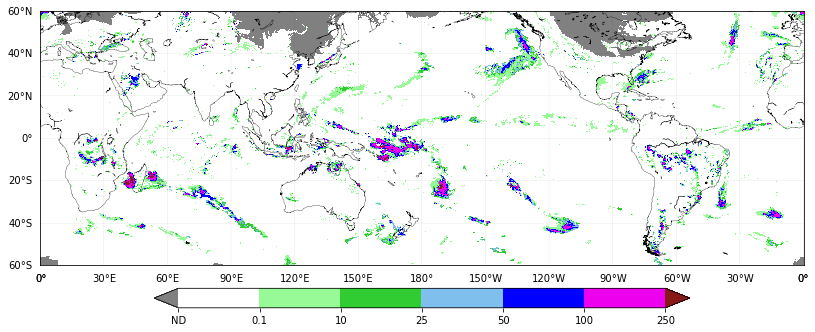

In [5]:
fig, ax = plt.subplots(figsize=(16,6))
lon_leftup=0;lat_leftup=60
lon_rightdown=360.1;lat_rightdown=-60
m = Basemap(projection='cyl', llcrnrlat=lat_rightdown, urcrnrlat=lat_leftup, llcrnrlon=lon_leftup, urcrnrlon=lon_rightdown, resolution='l')
m.drawcoastlines(linewidth=0.3, color='black')
parallels = np.arange(-60,80,20)
m.drawparallels(parallels,labels=[True,False,False,False],linewidth=0.2,dashes=[1,4])
meridians = np.arange(0,400,30)
m.drawmeridians(meridians,labels=[False,False,False,True],linewidth=0.2,dashes=[1,4])

cdict = ['w',(151 / 255, 250 / 255, 151 / 255), (49/ 255, 204 / 255, 49/ 255), (126/ 255, 191 / 255, 237 / 255)
    , (0 / 255, 0 / 255, 255 / 255), (237/ 255, 0 / 255, 237 / 255)]
my_cmap = colors.ListedColormap(cdict,'pre')
my_cmap.set_under('gray')
my_cmap.set_over((135/ 255, 25 / 255, 25 / 255))
lev=np.array([-60,0.1,10,25,50,100,250])
norm3 = mpl.colors.BoundaryNorm(lev, my_cmap.N)

lons, lats = np.meshgrid(lon,lat)
x, y = m(lons, lats)
pp=m.pcolormesh(x,y,pre*24,cmap=my_cmap,norm=norm3)

cb=fig.colorbar(pp,ax=ax,pad=0.07,shrink=0.6,aspect=25,orientation='horizontal',extend='both')
cb.set_ticks(lev)
cb.set_ticklabels(['ND',0.1,10,25,50,100,250])
